In [2]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
dataset = pd.read_csv('Employee_Salary_Data-22.csv')

features=dataset.iloc[:,1:4].values

given_salary=dataset.iloc[:,-1].values

index = list(dataset['Index'])

In [4]:
from sklearn.model_selection import train_test_split
features_train, features_test, given_salary_train, given_salary_test = train_test_split(features, given_salary, test_size=0.3, random_state=0)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(features_train, given_salary_train)
predictions = model.predict(features_test)
linear_predicted_salary = model.predict(features)
linear_predicted_salary

array([ 41043.333923  ,  42651.19578141,  44492.3196672 ,  49250.63739992,
        51091.76128571,  57457.94087684,  58456.25682886,  60219.62670553,
        60219.62670553,  64977.94443825,  66741.31431491,  67661.87625781,
        67273.10621217,  68271.42216419,  71875.91592664,  75869.17973473,
        77088.2715475 ,  93402.0543702 ,  89953.068626  ,  78307.36336028,
        83519.71898114,  98160.37210293,  83740.49484189,  90949.48236679,
        91560.93048441,  93944.43022285, 101153.41774775, 103370.82551255,
       107584.86518139, 109129.36140853,  57457.94087684, 109802.27294618,
       116571.61096081, 114016.31261502, 113887.67914125, 114237.08847577,
       120447.76004865, 107365.99153187, 121666.85186143, 109129.36140853])

In [6]:
print('linear regression mean squared error =', mean_squared_error(given_salary, linear_predicted_salary))
print('linear regression accuracy score =', round(r2_score(given_salary, linear_predicted_salary), 2))



linear regression mean squared error = 139738632.1620044
linear regression accuracy score = 0.82


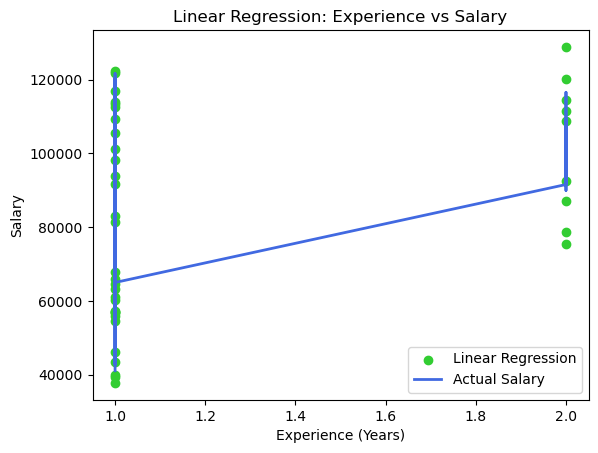

In [7]:
experience = features[:, 0]
sorted_indices = experience.argsort()
experience_sorted = experience[sorted_indices]
pred_sorted = linear_predicted_salary[sorted_indices]

plt.title('Linear Regression: Experience vs Salary')
plt.scatter(experience, given_salary, color='limegreen')
plt.plot(experience_sorted, pred_sorted, color='royalblue', linewidth=2)
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.legend(['Linear Regression', 'Actual Salary'])
plt.show()


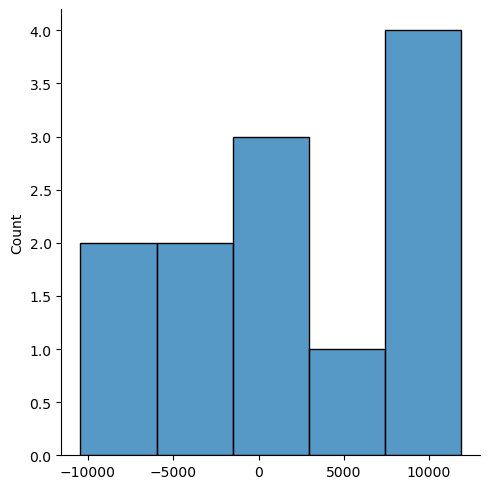

In [8]:
import seaborn as sns
sns.displot(predictions-given_salary_test)
